In [1]:
# conda install nltk
# conda install textblob
# conda install spacy
# conda install langdetect
# pip install sentiment-analysis-spanish
# pip install keras tensorflow
# pip install stylecloud

import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from textblob import TextBlob
from langdetect import detect
from sentiment_analysis_spanish import sentiment_analysis

#SpaCy
import spacy
from spacy import displacy


In [83]:
df1 = pd.read_csv('../data/juancarlos_2012_2013index.csv')
df = df1.copy()
df = df[['name','year','text']]

In [84]:
df.head()

,name,year,text
0,Juan Carlos I,2012,"Buenas noches,En esta Nochebuena, como cada añ..."
1,Juan Carlos I,2013,«Buenas noches. Quiero expresaros a todos mi c...


In [4]:
def quitar_corchetes (string):
    pattern = "(\[(.*?)\])"
    sin_corchetes = re.sub(pattern, "", string)
    return sin_corchetes

In [5]:
def tokenize(wiped_strng):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = [tokenizer.tokenize(wiped_strng)]
    return tokens

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/cristina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cristina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/cristina/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
first = tokenize(df['text'][0])

In [10]:
second = tokenize(df['text'][1])

In [12]:
df['toked']=""
df['toked'][0] = first[0]
df['toked'][1] = second[0]

<ipython-input-12-2a2e39f53a2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['toked'][0] = first[0]
<ipython-input-12-2a2e39f53a2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['toked'][1] = second[0]


In [13]:
df['toked'] = df['toked'].apply(lambda x: " ".join(x))

In [14]:
def translate_to_eng(strng):
    spanish_string = TextBlob(strng)
    try:
        english_blob=spanish_string.translate(from_lang='es',to='en')
        return "".join(list(english_blob))
    except:
        return strng

In [15]:
df['translated'] = df['toked'].apply(translate_to_eng)
df['translated'] = df['translated'].apply(lambda x: x.split(" "))

In [16]:
def stop_words (lst):
    stop_words = set(stopwords.words('english'))
    new_lst = []
    for strng in lst:
        if strng not in stop_words:
            new_lst.append(strng)
    return " ".join(new_lst)

In [17]:
df['translated'] = df['translated'].apply(stop_words)

In [18]:
blob_2012 = TextBlob(df['translated'][0]).sentiment
blob_2013 = TextBlob(df['translated'][1]).sentiment
print(blob_2012)

Sentiment(polarity=0.16534893677750825, subjectivity=0.45573355216212347)


In [20]:
df['sentiment_blob']= ""
df['sentiment_blob'][0]= blob_2012
df['sentiment_blob'][1]=blob_2013


<ipython-input-20-4e4edd35a674>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_blob'][0]= blob_2012
<ipython-input-20-4e4edd35a674>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_blob'][1]=blob_2013


In [ ]:
df['sentiment_blob'] = df.translated.apply()

In [21]:
def sentimentAnalysis(sentence):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(sentence)
    pol = polarity['compound']
    return pol

In [22]:
df['sentiment_compound'] = df.translated.apply(sentimentAnalysis)

In [51]:
tokes12_eng = tokenize(df['translated'][0])
tokes13_eng = tokenize(df['translated'][1])
fd12 = nltk.FreqDist(tokes12_eng[0])
fd13 = nltk.FreqDist(tokes13_eng[0])

In [66]:
df['most_common']=""
df['most_common'][0] = dict(fd12.most_common(20))
df['most_common'][1] = dict(fd13.most_common(20))

<ipython-input-66-93cdfb526875>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['most_common'][0] = dict(fd12.most_common(20))
<ipython-input-66-93cdfb526875>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['most_common'][1] = dict(fd13.most_common(20))


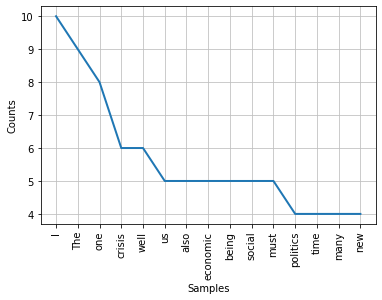

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [75]:
fd12.plot(15,cumulative=False)

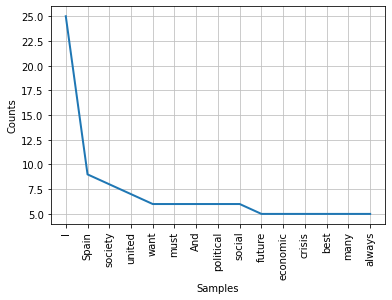

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [73]:
fd13.plot(15,cumulative=False)